## Polytope Climate-DT Bounding Box example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [ ]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [ ]:
# This request matches multiple parameter of the climate DT
 
import earthkit.data

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20210101",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        "type": "boundingbox",
        "points" : [[53.55, 2.76], [50.66, 7.86]],
    },
}

ds = earthkit.data.from_source("polytope", "destination-earth", request, stream=False, address='polytope.lumi.apps.dte.destination-earth.eu')


In [ ]:
ds._json()

In [6]:
da = ds.to_xarray()
da

<xarray.Dataset> Size: 133kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 2770)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2021-01-01T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 22kB 0 1 2 3 4 5 ... 2764 2765 2766 2767 2768 2769
    x          (points) float64 22kB 50.67 50.67 50.67 ... 53.52 53.52 53.52
    y          (points) float64 22kB 7.838 7.731 7.198 ... 3.038 3.153 2.924
    z          (points) float64 22kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    10u        (datetimes, number, steps, points) float64 22kB 3.132 ... 7.613
    2t         (datetimes, number, steps, points) float64 22kB 275.8 ... 278.7
Attributes: (12/16)
    activity:       scenariomip
    class:          d1
    dataset:        climate-dt
    Forecast date:  2021-01-01T00:00:00Z
    experiment:     ssp3-7.0
    expver:         0001
    ...             ...
    resolution:     high
    stream:         clte
    type:           fc
    number:         0
    step:           0
    date:           2021-01-01T00:00:00Z

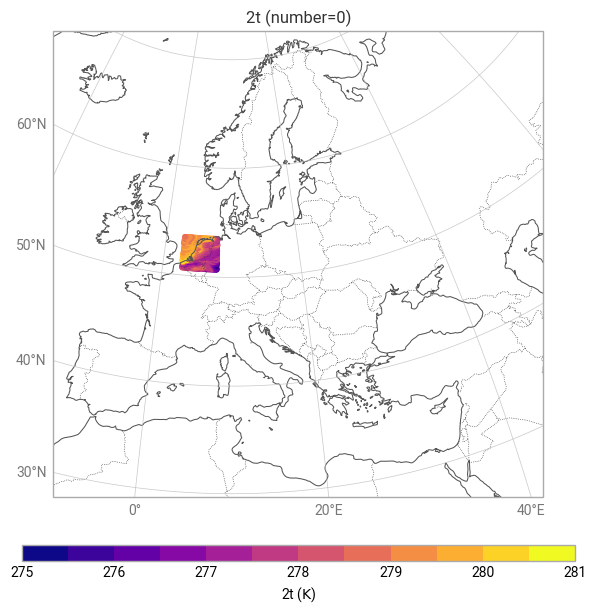

In [7]:
da = ds.to_xarray()
import earthkit.plots
chart = earthkit.plots.Map(domain="Europe")
chart.point_cloud(da['2t'], x="y", y="x")

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()